# CS-405 Deep Learning BS-CS/SE Fall-2023

# Assignment 1 Starter Notebook



# Dataset
The given dataset is a large-scale face dataset with long age span (range from 0 to 116 years old). The dataset consists of over 20,000 face images with annotations of age, gender, and ethnicity. We will be using only 7000 of the 20,000 images. The dataset in this assignment is going to be used for the following task:

##Given the pixels of an image, perform age estimation, ethnicity classification and gender classification for the image using a single neural network.


The dataset for this assignment is already cleaned and provided in a CSV format for you with images included as pixel values.

The 4 columns contain the following information:

* **[age]** is an integer from 0 to 116, indicating the age. You can convert it to float for regression predictions
* **[gender]** is either 0 (male) or 1 (female)
* **[race]** is an integer from 0 to 4, denoting White, Black, Asian, Indian, and Others (like Hispanic, Latino, Middle Eastern).
*  The 4th column contains the pixels of the images flattened to a single dimension. Each of the original image is of size 48x48 and the flattened image vector consists of 48x48 = 2304 pixel values.



In [169]:
!gdown https://drive.google.com/file/d/1_KRWsOhQNf6BZcdu4pg2JVy-lHo7_Cno/view?usp=sharing --fuzzy


Downloading...
From: https://drive.google.com/uc?id=1_KRWsOhQNf6BZcdu4pg2JVy-lHo7_Cno
To: /content/DL_assignment1_dataset.csv
100% 199M/199M [00:01<00:00, 99.9MB/s]


In [170]:
import pandas
import numpy as np
import matplotlib.pyplot as plt
import random

In [171]:
# Lets use pandas to load our data
df = pandas.read_csv("/content/DL_assignment1_dataset.csv")

# I used this when I was having "ACCESS DENIED" error :/
#df = pandas.read_csv("DL_assignment1_dataset (1).csv")

df

,age,ethnicity,gender,pixels
0,1,2,0,129 128 128 126 127 130 133 135 139 142 145 14...
1,1,2,0,164 74 111 168 169 171 175 182 184 188 193 199...
2,1,2,0,67 70 71 70 69 67 70 79 90 103 116 132 145 155...
3,1,2,0,193 197 198 200 199 200 202 203 204 205 208 21...
4,1,2,0,202 205 209 210 209 209 210 211 212 214 218 21...
...,...,...,...,...
23700,99,0,1,127 100 94 81 77 77 74 99 102 98 128 145 160 1...
23701,99,1,1,23 28 32 35 42 47 68 85 98 103 113 117 130 129...
23702,99,2,1,59 50 37 40 34 19 30 101 156 170 177 184 187 1...
23703,99,2,1,45 108 120 156 206 197 140 180 191 199 204 207...


### For this assignment we will be using fully connected neural networks and hence to keep things simple we will only use 7000 of the ~20000 images for quick training times.

### Please do not change the seed for the sampling of data points.

In [172]:
random_seed = 42
df_sampled = df.sample(n=7000, random_state=random_seed)
df_sampled.reset_index(drop=True, inplace=True)
df_sampled

,age,ethnicity,gender,pixels
0,49,1,1,31 32 28 27 34 38 37 40 47 51 52 57 72 93 118 ...
1,39,1,0,186 65 38 40 36 51 64 64 60 55 58 60 73 79 82 ...
2,8,4,0,20 23 35 34 45 65 69 72 79 92 106 115 134 148 ...
3,40,4,0,6 6 13 19 15 23 41 76 106 125 133 138 152 158 ...
4,27,0,0,31 31 29 51 98 136 162 175 176 178 178 179 184...
...,...,...,...,...
6995,49,3,0,128 130 131 131 132 134 134 140 72 43 102 77 1...
6996,28,1,1,28 22 19 23 16 22 19 31 64 81 88 96 108 120 13...
6997,32,3,1,221 229 227 200 166 115 146 198 186 184 178 15...
6998,41,0,0,58 61 76 58 83 71 74 90 71 112 77 91 111 135 1...


Let us take a look at an image. You will get an idea of how to process your data for your neural network.

The 4th column contains all the pixel values in a string for each image. Lets convert all the strings to arrays first.

In [173]:
def string_to_array(pixel_string):
    pixel_list = pixel_string.split()
    pixel_array = np.array([int(value) for value in pixel_list])
    return pixel_array

In [174]:
df_sampled['pixels'] = df_sampled['pixels'].apply(string_to_array)

In [175]:
df_sampled['pixels']

0       [31, 32, 28, 27, 34, 38, 37, 40, 47, 51, 52, 5...
1       [186, 65, 38, 40, 36, 51, 64, 64, 60, 55, 58, ...
2       [20, 23, 35, 34, 45, 65, 69, 72, 79, 92, 106, ...
3       [6, 6, 13, 19, 15, 23, 41, 76, 106, 125, 133, ...
4       [31, 31, 29, 51, 98, 136, 162, 175, 176, 178, ...
                              ...                        
6995    [128, 130, 131, 131, 132, 134, 134, 140, 72, 4...
6996    [28, 22, 19, 23, 16, 22, 19, 31, 64, 81, 88, 9...
6997    [221, 229, 227, 200, 166, 115, 146, 198, 186, ...
6998    [58, 61, 76, 58, 83, 71, 74, 90, 71, 112, 77, ...
6999    [19, 21, 20, 23, 33, 54, 90, 128, 149, 169, 17...
Name: pixels, Length: 7000, dtype: object

Our "pixels" column has been converted to arrays which we can now use as input features to our model

Lets show the first image of our dataset

Age: 28
Ethnicity: 3
Gender: 0


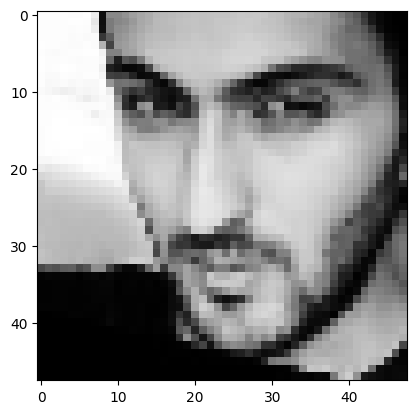

In [176]:
index = 30
first_image = df_sampled['pixels'][index]
image = first_image.reshape((48,48))
print("Age: "+str(df_sampled["age"][index])+"\nEthnicity: "+str(df_sampled["ethnicity"][index])+ "\nGender: "+str(df_sampled["gender"][index]))
plt.imshow(image,cmap="gray")

Uptill now, an initial processing has already been done using pandas in this starter code jupyter notebook. Hence you have a data frame ready for your assignment.

Please use the dataframe "df_sampled" for your assignment.

# You should consult the Assignment 1 document provided to you on LMS  for information regarding the tasks that are needed to be done for successful completion of this assignment. Grading rubricks are also mentioned in detail there.



#Importing Necessary Libraries

In [177]:
# Write any further imports you need here

import torch
from torch import nn
from torch.utils.data import random_split, DataLoader, TensorDataset

#Setting Seed to get Same Results

In [178]:
def set_seeds(seed):
    torch.backends.cudnn.benchmark = False
    torch.backends.cudnn.determinictic = True
    torch.cuda.manual_seed_all(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    random.seed(seed)
set_seeds(42)

# Check if GPU is available.

In [179]:
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
print ('<== CUDA availability : ==>', use_cuda)

<== CUDA availability : ==> True


# Defining our Neural Network

In [180]:
class Multi_Task_Neural_Network(nn.Module):

  # Initializing our Neural Network
  def __init__(self):

    super(Multi_Task_Neural_Network, self).__init__() # Accessing the 'nn' super class

    # Initializing feature extraction Layers for our Neural Net:
    self.features = nn.Sequential (

        nn.Linear(48*48, 1580),
        nn.BatchNorm1d(1580),
        nn.ReLU(inplace=True),
        nn.Dropout(),

        nn.Linear(1580, 1080),
        nn.BatchNorm1d(1080),
        nn.ReLU(inplace=True),
        nn.Dropout()
    )

    # Subnetwork for age regression
    self.age = nn.Sequential (

        nn.Linear(1080, 700),
        nn.BatchNorm1d(700),
        nn.ReLU(inplace=True),
        nn.Dropout(),

        nn.Linear(700, 500),
        nn.BatchNorm1d(500),
        nn.ReLU(inplace=True),
        nn.Dropout(),

        nn.Linear(500, 250),
        nn.BatchNorm1d(250),
        nn.ReLU(inplace=True),
        nn.Dropout(),

        nn.Linear(250, 1)
    )

    # Subnetwork for ethnicity multi classification
    self.ethnicity = nn.Sequential (

        nn.Linear(1080, 512),
        nn.BatchNorm1d(512),
        nn.ReLU(inplace=True),
        nn.Dropout(),

        nn.Linear(512, 256),
        nn.BatchNorm1d(256),
        nn.ReLU(inplace=True),
        nn.Dropout(),

        nn.Linear(256, 5)
    )

    # Subnetwork for gender binary classification
    self.gender = nn.Sequential (
        nn.Linear(1080, 512),
        nn.BatchNorm1d(512),
        nn.ReLU(inplace=True),
        nn.Dropout(),

        nn.Linear(512, 256),
        nn.BatchNorm1d(256),
        nn.ReLU(inplace=True),
        nn.Dropout(),

        nn.Linear(256, 1),
        nn.Sigmoid()
    )

  # Function for extracting features from images
  def feature_extractor(self, x):
    F = self.features(x)
    return F

  # Defining Forward Propogation Function
  def forward(self, x):

    # Getting representation vector
    r_vector = self.feature_extractor(x)

    # Getting respective output heads
    age = self.age(r_vector)
    ethnicity = self.ethnicity(r_vector)
    gender = self.gender(r_vector)

    return age, ethnicity, gender

model = Multi_Task_Neural_Network().to(device)
print(model)

Multi_Task_Neural_Network(
  (features): Sequential(
    (0): Linear(in_features=2304, out_features=1580, bias=True)
    (1): BatchNorm1d(1580, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): Dropout(p=0.5, inplace=False)
    (4): Linear(in_features=1580, out_features=1080, bias=True)
    (5): BatchNorm1d(1080, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (6): ReLU(inplace=True)
    (7): Dropout(p=0.5, inplace=False)
  )
  (age): Sequential(
    (0): Linear(in_features=1080, out_features=700, bias=True)
    (1): BatchNorm1d(700, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): Dropout(p=0.5, inplace=False)
    (4): Linear(in_features=700, out_features=500, bias=True)
    (5): BatchNorm1d(500, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (6): ReLU(inplace=True)
    (7): Dropout(p=0.5, inplace=False)
    (8): Linear(in_features=500, out_fe

# DataLoader & Data Splitting

In [181]:
# Converting datagrams to tensors
input = torch.tensor(df_sampled["pixels"])
age = torch.tensor(df_sampled["age"])
ethnicity = torch.tensor(df_sampled["ethnicity"])
gender = torch.tensor(df_sampled["gender"])

# Creating a custom dataset
dataset = TensorDataset(input, age, ethnicity, gender)

# Defining Split Ratios:
train_ratio = int(0.70 * len(df_sampled)) # 70% split for train set
val_ratio = int(0.15 * len(df_sampled)) # 15% for validation set
test_ratio =  int(0.15 * len(df_sampled)) # 15% split for testing set

# Splitting the dataset into train, validation, and test sets:
trainset, testset, valset = random_split(dataset, [train_ratio,test_ratio,val_ratio], generator=torch.Generator().manual_seed(42))

# Defining Batch Size
batch = 64

# Creating Dataloaders:
traindata = DataLoader(trainset, batch_size=batch)
valdata = DataLoader(valset, batch_size=batch)
testdata = DataLoader(testset, batch_size=batch)

In [182]:
# Loss Function for age Regression
a_L = nn.MSELoss()

# Loss Function for ethnicity classification
e_L = nn.CrossEntropyLoss()

# Loss Function for gender classification
g_L = nn.BCELoss()

# Mean Absolute Loss for age
mae = nn.L1Loss()

# Defining our Optimizer
optimizer = torch.optim.Adam(model.parameters(), lr = 1e-3, weight_decay = 0.001)

# Train Function

In [183]:
# Defining Train function
def train(epoch):

  running_gender_loss = 0
  running_ethnicity_loss = 0
  MSE = 0

  model.train() # Setting the model to train

  for x, age, ethnicity, gender in traindata:

    # Converting to float type tensors
    gender = gender.float()
    age = age.float()

    x, age, ethnicity, gender = x.to(device), age.to(device), ethnicity.to(device), gender.to(device) # assign input samples to the available device (CPU or GPU) for computation.

    # Forward Pass
    age_pred, ethnicity_pred, gender_pred = model.forward(x.float())

    # Computing loss for age
    age_loss = a_L(age_pred, age.reshape(-1,1))
    MSE += age_loss.item()

    # Computing loss for ethnicity
    ethnicity_loss = e_L(ethnicity_pred, ethnicity)
    running_ethnicity_loss += ethnicity_loss.item()

    # Computing loss for gender
    gender_loss = g_L(gender_pred, gender.reshape(-1,1))
    running_gender_loss += gender_loss.item()

    # Defining a weighted total loss for this model
    total_loss = (0.05 * age_loss) + (2 * ethnicity_loss) + (2 * gender_loss)

    # Backpropogation
    optimizer.zero_grad() # Making gradient equal to zero to avoid accumulation
    total_loss.backward() # Calculating gradients
    optimizer.step() # Updating weights and biases

  # Calculating Losses for each task
  avg_MSE_loss = MSE/len(traindata)
  avg_gender_loss = running_gender_loss/len(traindata)
  avg_ethnicity_loss = running_ethnicity_loss/len(traindata)

  # Displaying Losses
  print(f"Epoch {epoch+1}: (Training) MSE: {avg_MSE_loss:>0.1f}  Avg Gender Loss: {avg_gender_loss:>0.3f}  Avg Ethnicity Loss: {avg_ethnicity_loss:>0.3f}")

  return avg_MSE_loss, avg_gender_loss, avg_ethnicity_loss

#Validation Function


In [184]:
# Defining Validate function
def validate():

  running_gender_loss = 0
  running_ethnicity_loss = 0
  MSE = 0
  total_acc = 0
  gender_acc = 0
  ethnicity_acc = 0

  model.eval() # Setting the model in evaluation mode

  for x, age, ethnicity, gender in valdata:

    x, age, ethnicity, gender = x.to(device), age.to(device), ethnicity.to(device), gender.to(device) # assign input samples to the available device (CPU or GPU) for computation.

    # Converting tensors to float type
    gender = gender.float()
    age = age.float()

    with torch.no_grad(): # Calculating no gradients in case of validation

      # Forward Pass
      age_pred, ethnicity_pred, gender_pred = model.forward(x.float())

      # Computing loss for age
      age_loss = a_L(age_pred, age.reshape(-1,1))
      MSE += age_loss.item()

      # Computing loss for ethnicity
      ethnicity_loss = e_L(ethnicity_pred, ethnicity)
      running_ethnicity_loss += ethnicity_loss.item()

      # Computing loss for gender
      gender_loss = g_L(gender_pred, gender.reshape(-1,1))
      running_gender_loss += gender_loss.item()

    # Predicting accuracy for gender classification:
    gender_acc += (gender_pred.reshape(-1).round() == gender).sum()

    # Predicting accuracy for ethnicity classification:
    ethnicity_acc += (ethnicity_pred.argmax(1) == ethnicity).sum()

    # Predicting combined accuracy of the model
    total_acc += torch.logical_and(ethnicity_pred.argmax(1) == ethnicity, gender_pred.reshape(-1).round() == gender).sum()

  # Calculating Losses for each task
  avg_MSE_loss = MSE/len(valdata)
  avg_gender_loss = running_gender_loss/len(valdata)
  avg_ethnicity_loss = running_ethnicity_loss/len(valdata)

  # Displaying Respective Accuracies and Losses
  print(f"\t (Validation) MSE: {avg_MSE_loss:>0.1f} Avg Gender Loss: {avg_gender_loss:>0.3f} Avg Ethnicity Loss: {avg_ethnicity_loss:>0.3f}")

  return avg_MSE_loss, avg_gender_loss, avg_ethnicity_loss

# Test Function

In [185]:
# Defining Test function

def test():

  total_acc = 0
  gender_acc = 0
  ethnicity_acc = 0
  MSE = 0
  MAE = 0
  running_gender_loss = 0
  running_ethnicity_loss = 0

  model.eval() # Setting the model in evaluation mode

  for x, age, ethnicity, gender in testdata:

    x, age, ethnicity, gender = x.to(device), age.to(device), ethnicity.to(device), gender.to(device) # assign input samples to the available device (CPU or GPU) for computation.

    # Converting to float type tensors
    gender = gender.float()
    age = age.float()

    with torch.no_grad():

      # Forward Pass
      age_pred, ethnicity_pred, gender_pred = model.forward(x.float())

      # Computing loss for age
      age_loss = a_L(age_pred, age.reshape(-1,1))
      MSE += age_loss.item()

      # Computing Mean Absolute Error
      mae_loss = mae(age_pred, age.reshape(-1,1))
      MAE += mae_loss

      # Computing loss for ethnicity
      ethnicity_loss = e_L(ethnicity_pred, ethnicity)
      running_ethnicity_loss += ethnicity_loss.item()

      # Computing loss for gender
      gender_loss = g_L(gender_pred, gender.reshape(-1,1))
      running_gender_loss += gender_loss.item()

    # Predicting accuracy for gender classification:
    gender_acc += (gender_pred.reshape(-1).round() == gender).sum()

    # Predicting accuracy for ethnicity classification:
    ethnicity_acc += (ethnicity_pred.argmax(1) == ethnicity).sum()

    # Predicting combined classification accuracy of the model
    total_acc += torch.logical_and(ethnicity_pred.argmax(1) == ethnicity, gender_pred.reshape(-1).round() == gender).sum()

  # Calculating Losses for each task
  avg_MSE_loss = MSE/len(testdata)
  avg_gender_loss = running_gender_loss/len(testdata)
  avg_ethnicity_loss = running_ethnicity_loss/len(testdata)

  # Displaying Respective Accuracies and Losses
  print(f"MSE: {avg_MSE_loss:>0.1f}")
  print(f"RMSE: {np.sqrt(avg_MSE_loss):>0.1f}")
  print(f"MAE {MAE/len(testdata):>0.1f}\n")

  print(f"Gender Accuracy: {(gender_acc/test_ratio * 100):>0.1f}%")
  print(f"Avg Gender Loss: {avg_gender_loss:>0.3f} \n")

  print(f"Ethnicity Accuracy: {(ethnicity_acc/test_ratio * 100):>0.1f}%")
  print(f"Avg Ethnicity Loss: {avg_ethnicity_loss:>0.3f} \n")

  print(f"Combined Accuracy: {(total_acc/test_ratio * 100):>0.1f}% \n")


# Training & Testing our Model

In [186]:
# Defining number of Epochs
Epochs = 38

# Train and Validation losses
train_mse, val_mse = [], []
train_gender_loss, val_gender_loss = [], []
train_ethnicity_loss, val_ethnicity_loss = [], []

for i in range(Epochs):

  # First, we train the model
  mse_loss, gender_loss, ethnicity_loss = train(i)

  train_mse.append(mse_loss)
  train_gender_loss.append(gender_loss)
  train_ethnicity_loss.append(ethnicity_loss)

  # Next, we validate it on new data
  mse_loss, gender_loss, ethnicity_loss = validate()

  val_mse.append(mse_loss)
  val_gender_loss.append(gender_loss)
  val_ethnicity_loss.append(ethnicity_loss)

# Lastly, we test the model on unseen data:

print("\nx--------Testing--------x\n")

test()

print("x-----------------------x")

Epoch 1: (Training) MSE: 1217.5  Avg Gender Loss: 0.642  Avg Ethnicity Loss: 1.396
	 (Validation) MSE: 890.2 Avg Gender Loss: 0.620 Avg Ethnicity Loss: 1.254
Epoch 2: (Training) MSE: 650.0  Avg Gender Loss: 0.576  Avg Ethnicity Loss: 1.289
	 (Validation) MSE: 617.6 Avg Gender Loss: 0.569 Avg Ethnicity Loss: 1.297
Epoch 3: (Training) MSE: 328.6  Avg Gender Loss: 0.545  Avg Ethnicity Loss: 1.258
	 (Validation) MSE: 225.1 Avg Gender Loss: 0.506 Avg Ethnicity Loss: 1.145
Epoch 4: (Training) MSE: 228.3  Avg Gender Loss: 0.515  Avg Ethnicity Loss: 1.215
	 (Validation) MSE: 221.6 Avg Gender Loss: 0.450 Avg Ethnicity Loss: 1.122
Epoch 5: (Training) MSE: 196.1  Avg Gender Loss: 0.482  Avg Ethnicity Loss: 1.192
	 (Validation) MSE: 231.6 Avg Gender Loss: 0.440 Avg Ethnicity Loss: 1.194
Epoch 6: (Training) MSE: 182.2  Avg Gender Loss: 0.447  Avg Ethnicity Loss: 1.150
	 (Validation) MSE: 212.9 Avg Gender Loss: 0.426 Avg Ethnicity Loss: 1.076
Epoch 7: (Training) MSE: 175.9  Avg Gender Loss: 0.427  A

# Plotting Graphs

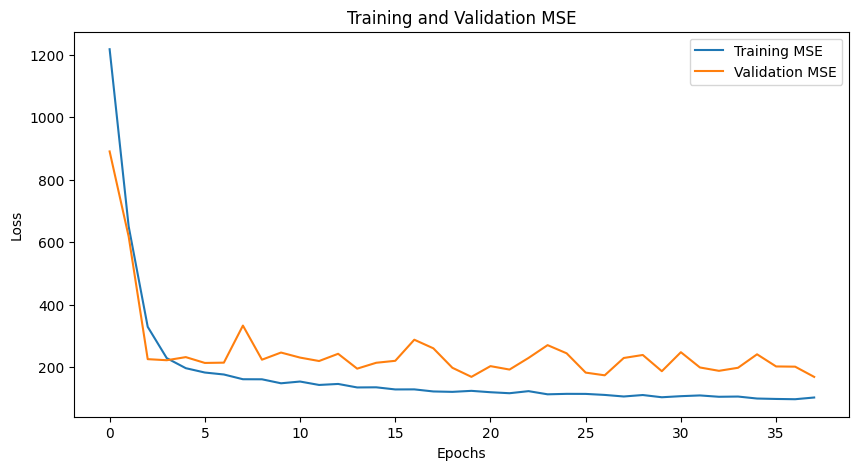

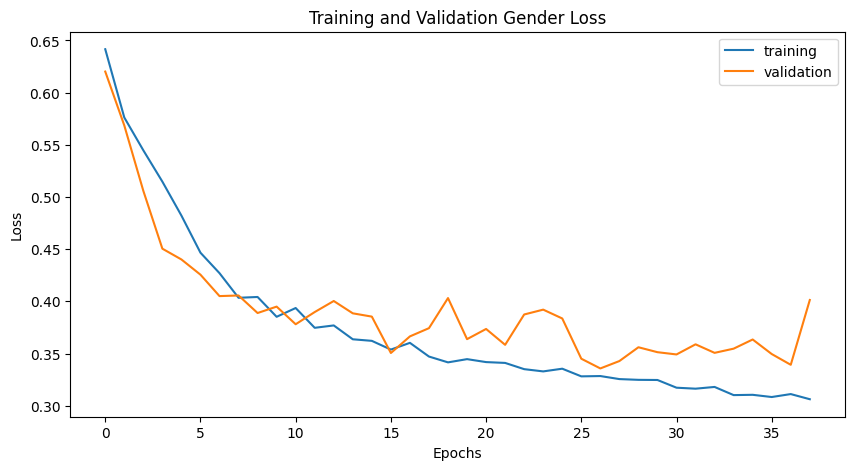

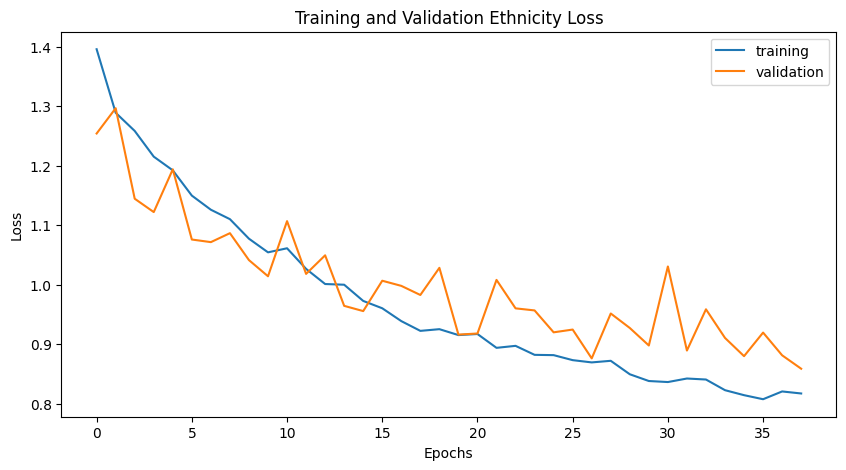

In [187]:
# Training MSE Vs Validaiton MSE
plt.figure(figsize=(10,5))
plt.title("Training and Validation MSE")
plt.plot(train_mse, label="Training MSE")
plt.plot(val_mse, label="Validation MSE")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

# Training Gender Loss Vs Validation Gender Loss
plt.figure(figsize=(10,5))
plt.title("Training and Validation Gender Loss")
plt.plot(train_gender_loss, label="training")
plt.plot(val_gender_loss, label="validation")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

# Training Ethnicity Loss Vs Validation Ethnicity Loss
plt.figure(figsize=(10,5))
plt.title("Training and Validation Ethnicity Loss")
plt.plot(train_ethnicity_loss, label="training")
plt.plot(val_ethnicity_loss, label="validation")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

# Saving state of the Model

In [188]:
torch.save(model.state_dict(), "model.pth")
print("Saved PyTorch Model State to model.pth")

Saved PyTorch Model State to model.pth


# Inferencing our Model

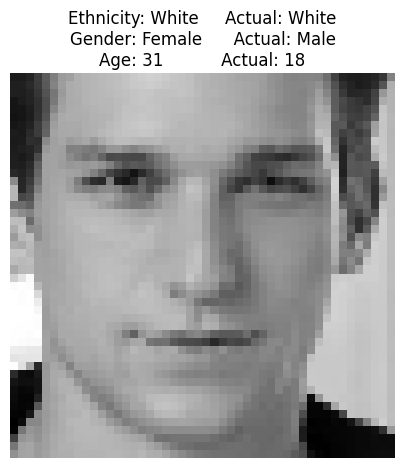

In [207]:
ethnicity = [
    "White",
    "Black",
    "Asian",
    "Indian",
    "Other",
]

gender = [
    "Male",
    "Female",
]

model.to("cpu")

# The sample you want to test
Sample = 521 # # Keep sample between 0 and 1050

# Getting the required image
img = testset[Sample][0]
model.eval()

# Getting Output
with torch.no_grad():
  age_pred, ethnicity_pred, gender_pred = model.forward(img.view(1,2304).float())

# Getting predicted and actual outputs
pred_a, actual_a = int(age_pred), int(testset[Sample][1])
pred_g, actual_g = gender[int(gender_pred.round())], gender[testset[Sample][3]]
pred_e, actual_e = ethnicity[ethnicity_pred.argmax()], ethnicity[testset[Sample][2]]

# Displaying Result
plt.figure(figsize=(5,5))

plt.title("Ethnicity: " + pred_e + "     Actual: " + actual_e
          + "\nGender: " + str(pred_g) + "      Actual: " + str(actual_g)
          + "\nAge: " + str(pred_a) + "           Actual: " + str(actual_a)
          )

plt.axis("off")
img = img.reshape((48,48))
plt.imshow(img, cmap="gray")